<a href="https://colab.research.google.com/github/Shriyash11/GIRME/blob/main/sentiment_analysis_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
import numpy as np
import pandas as pd

In [236]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download stopwords and WordNet if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('wordnet')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Prepare Data

## Import Libraries

In [227]:
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
# Ignore FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

## Read csv files

In [230]:
d = pd.read_csv('/content/train.csv',encoding='latin1');
f = pd.read_csv('/content/test.csv',encoding='latin1');
df = pd.concat([d,f])

## Explore dataset

In [231]:
print(df.shape)
print(df.info())
df.head()

(32296, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32296 entries, 0 to 4814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.7+ MB
None


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


## Convert Data

In [232]:
df.dropna(inplace=True)

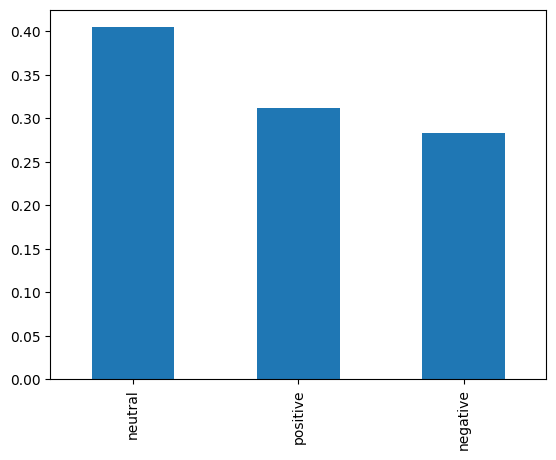

In [233]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar');

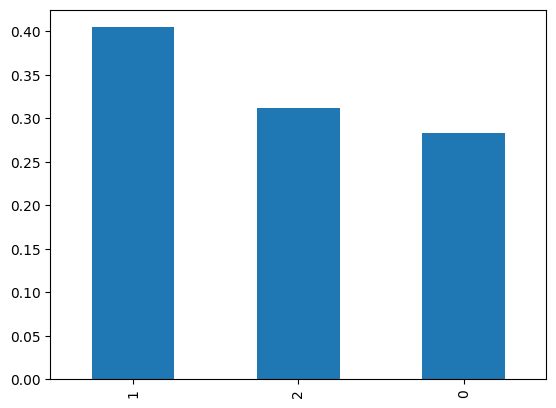

In [234]:
# Convert sentiment column to categorical variable
df['sentiment'] = df['sentiment'].astype('category').cat.codes
df['sentiment'].value_counts(normalize=True).plot(kind='bar');

## Drop unuseful data

In [235]:
df.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",1
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,my boss is bullying me...,bullying me,0
3,what interview! leave me alone,leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0
...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,0
27477,I`ve wondered about rake to. The client has ...,", don`t force",0
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,2
27479,But it was worth it ****.,But it was worth it ****.,2


## Creat a function to process text

In [ ]:
# df['selected_text'] = df["selected_text"].apply(wp)

## process txt

In [237]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove digits
    text = re.sub('\w*\d\w*', '', text)
    # Remove stopwords and lemmatize
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text





## **traingn**

In [238]:
# Assuming you have your dataset loaded into 'df'

# Preprocess the selected_text column
df['selected_text'] = df['selected_text'].apply(preprocess_text)

# Split the data into training and testing sets
X = df['selected_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
XV_train = vectorizer.fit_transform(X_train)
XV_test = vectorizer.transform(X_test)

In [239]:
# Train a logistic regression model
lr = LogisticRegression(n_jobs=-1)
lr.fit(XV_train, y_train)

# Predict sentiment for the test set
pred_lr = lr.predict(XV_test)



In [240]:
# Evaluate the model
accuracy = accuracy_score(y_test, pred_lr)
print("Accuracy:", accuracy)
print(classification_report(y_test, pred_lr))

Accuracy: 0.8040393013100436
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      1572
           1       0.77      0.86      0.81      2236
           2       0.87      0.79      0.83      1688

    accuracy                           0.80      5496
   macro avg       0.81      0.80      0.80      5496
weighted avg       0.81      0.80      0.80      5496



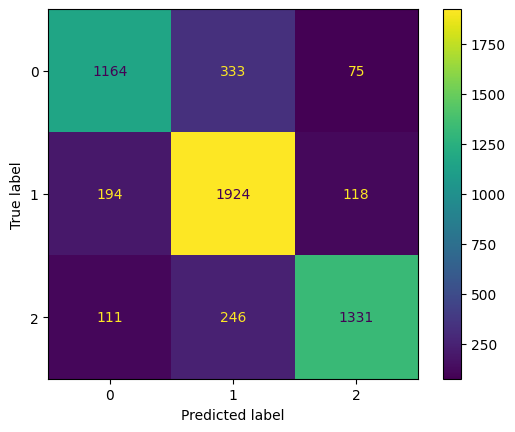

In [241]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_lr);

In [242]:
# Function to classify the sentiment of input text and return overall sentiment label
def classify_sentiment(text):
    processed_text = preprocess_text(text)
    predicted_sentiment = lr.predict(vectorizer.transform([processed_text]))[0]
    return output_label(predicted_sentiment)




In [243]:
# Function to classify each word in the input passage into its corresponding sentiment label
def classify_words_sentiment(text):
    processed_text = preprocess_text(text)
    words = processed_text.split()
    word_sentiments = [(word, output_label(lr.predict(vectorizer.transform([word]))[0])) for word in words]
    return word_sentiments


In [249]:
# Example usage
input_text = input()
overall_sentiment = classify_sentiment(input_text)
print("Overall Sentiment:", overall_sentiment)

word_sentiments = classify_words_sentiment(input_text)
for word, sentiment in word_sentiments:
    print(word, ":", sentiment)



I finished the laundry and cleaned the apartment. It wasn't particularly exciting, but it needed to be done. Now I have the rest of the day free to do whatever I want.
Overall Sentiment: Neutral
finished : Neutral
laundry : Neutral
cleaned : Neutral
apartment : Neutral
wasnt : Neutral
particularly : Neutral
exciting : Positive
needed : Neutral
done : Positive
rest : Positive
day : Neutral
free : Positive
whatever : Neutral
want : Neutral


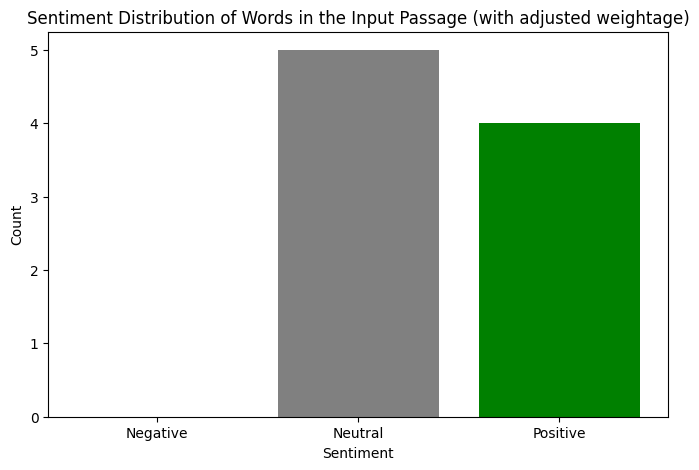

Overall Sentiment: Positive


In [250]:
# Adjusted weightage for neutral
neutral_weightage = 0.5  # Adjust this value as needed

# Counting sentiments with adjusted weightage for neutral
sentiment_counts = {'Negative': 0, 'Neutral': 0, 'Positive': 0}
for _, sentiment in word_sentiments:
    if sentiment == 'Neutral':
        sentiment_counts[sentiment] += neutral_weightage
    else:
        sentiment_counts[sentiment] += 1

# Adjust overall sentiment based on neutral weightage
overall_sentiment = sentiment_counts['Positive'] - sentiment_counts['Negative']
if overall_sentiment > 0:
    overall_sentiment_label = 'Positive'
elif overall_sentiment < 0:
    overall_sentiment_label = 'Negative'
else:
    overall_sentiment_label = 'Neutral'

# Plotting the bar chart
sentiments = ['Negative', 'Neutral', 'Positive']
counts = [sentiment_counts[sentiment] for sentiment in sentiments]
colors = ['red', 'gray', 'green']

plt.figure(figsize=(8, 5))
plt.bar(sentiments, counts, color=colors)
plt.title('Sentiment Distribution of Words in the Input Passage (with adjusted weightage)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Printing overall sentiment
print("Overall Sentiment:", overall_sentiment_label)



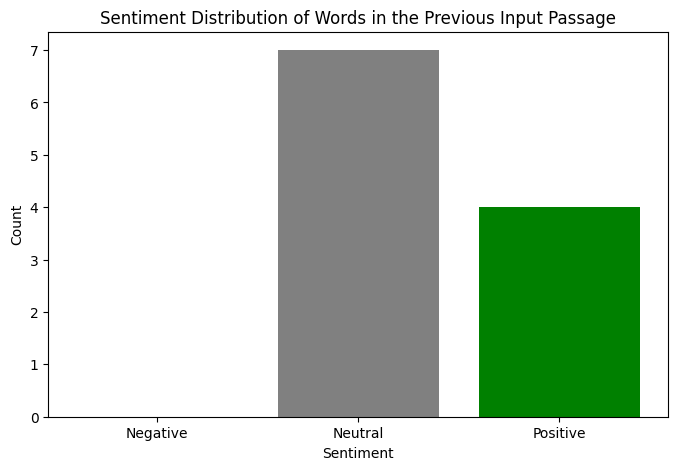

In [245]:
# # Counting sentiments
# sentiment_counts = {'Negative': 0, 'Neutral': 0, 'Positive': 0}
# for _, sentiment in word_sentiments:
#     sentiment_counts[sentiment] += 1


# # Plotting the bar chart
# sentiments = ['Negative', 'Neutral', 'Positive']
# counts = [sentiment_counts[sentiment] for sentiment in sentiments]
# colors = ['red', 'gray', 'green']

# plt.figure(figsize=(8, 5))
# plt.bar(sentiments, counts, color=colors)
# plt.title('Sentiment Distribution of Words in the Previous Input Passage')
# plt.xlabel('Sentiment')
# plt.ylabel('Count')
# plt.show()

In [ ]:
# # from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# import re
# import string

# # Download stopwords and WordNet if not already downloaded
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

# def wp(text):
#     stop_words = set(stopwords.words('english'))
#     lemmatizer = WordNetLemmatizer()

#     text = text.lower()
#     text = re.sub('\[.*?\]', '', text)
#     text = re.sub("\\W"," ",text)
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
#     text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
#     # Remove stopwords and lemmatize
#     text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word.lower() not in stop_words)
#     return text

# # Test the function
# print(wp("However, I forgot my umbrella at home and got caught in the rain on my way back."))

however forgot umbrella home got caught rain way back


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
